# Digits Recognition using Naive Bayes
Kaggle: https://www.kaggle.com/c/digit-recognizer
## Import packages and read data

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Read training images
# Around 42000 images
train = pd.read_csv('train.csv')
print('shape', train.shape)
test = pd.read_csv('test.csv')
print('shape', test.shape)

# Show data, all pixels are binary and the first col is label 
train.head()

shape (42000, 785)
shape (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train the Naive Bayes (NB) model

In [36]:
'First 10k images are used for training; next 2k images for testing'

x_train, y_train = train.iloc[:40000, 1:], train.iloc[:40000, 0]
x_test, y_test = train.iloc[40000:, 1:], train.iloc[40000:, 0]

from sklearn.naive_bayes import MultinomialNB # for categorical variables
from sklearn.naive_bayes import GaussianNB # for continuous variables
from sklearn.naive_bayes import BernoulliNB # for binary variables

clf = BernoulliNB()
clf.fit(x_train, y_train.ravel()) 

BernoulliNB()

In [37]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(f'Accuracy of NB is {accuracy_score(y_test, y_pred)}')

Accuracy of NB is 0.834


## Visualize output

True label: 9 predicted: 9


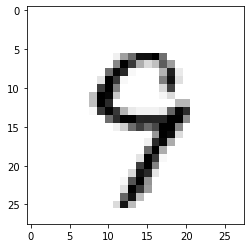

In [43]:
#28 pixels in height and 28 
# Input the id of the test image
id = 99

B = np.reshape(x_test.iloc[id].values, (28, 28)) 

# Standard pyplot command to display image
plt.imshow(B, cmap=plt.cm.gray_r, interpolation='nearest')
print('True label:',y_test.iloc[id], 'predicted:', y_pred[id])

## Do prediction on test data

In [50]:
pred = clf.predict(test)
submit = pd.read_csv('sample_submission.csv')
submit['Label'] = pred 
submit.to_csv('sample_submission.csv', index = False)
print("Completed")

Completed
